#  Игра в жизнь

|V| = 100 вершин

На нулевой итерации все вершины синие  
На первой итерации случайным образом закрашиваются вершины в красный цвет  
На следующих итерациях:  
Красный цвет, если в ее окружении более 50% красных вершин, менее 50% красных вершин — синий

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def draw_generated_graph(graph, pos):
    G_edges = graph.edges()
    G_nodes = graph.nodes()
    V = len(graph.nodes())
    ndl = random.sample(list(G_nodes), k= V//2)
    ndl_1 = [i for i in G_nodes if not i in ndl]
    for i in G_nodes:
        if i in ndl:
            graph.nodes[i]['color'] = 'red'
        else:
            graph.nodes[i]['color'] = 'blue'

    draw_graph(graph, pos, ndl, ndl_1)
    return ndl, ndl_1 

In [3]:
def draw_graph(graph, pos, red, blue):
    plt.figure(figsize = (15, 15))   
    nx.draw_networkx_nodes(graph, pos, nodelist=red, 
                           node_color="tab:red", node_size = 550)
    nx.draw_networkx_nodes(graph, pos, nodelist=blue, 
                           node_color="tab:blue", node_size = 550) 
    nx.draw_networkx_edges(graph, pos=pos, edgelist=graph.edges())
    plt.axis('off')
    plt.show()

In [4]:
def generate_chart(red_nums, blue_nums):
    figure(figsize= (10, 6), dpi=80)
    x = range(len(red_nums))
    y1, y2 = red_nums, blue_nums
    plt.plot(x, y1, label = "красные", color='r')
    plt.plot(x, y2, label = "синие")
    plt.legend()
    plt.show()
    return y1, y2

In [5]:
def iterations(Gr):
    nodes_all_red, nodes_all_blue = [], []
    for node in Gr.nodes:
        nodes_red = 0
        nodes_blue = 0
        for nn in Gr.edges(node):
            if Gr.nodes[nn[1]]['color'] == 'red':
                nodes_red += 1
            else:
                nodes_blue += 1
        if Gr.nodes[nn[0]]['color'] == 'red':
            if nodes_red==len(Gr.edges(node)) or nodes_red<nodes_blue:
                Gr.nodes[nn[0]]['color'] = 'blue'
                nodes_all_blue.append(nn[0])
            else:
                nodes_all_red.append(nn[0])
        else:
            if nodes_red>nodes_blue and nodes_blue!=len(Gr.edges(node)):
                Gr.nodes[nn[0]]['color'] = 'red'
                nodes_all_red.append(nn[0])
            else:
                nodes_all_blue.append(nn[0])
    return Gr, nodes_all_red, nodes_all_blue

In [6]:
def main(graph, ndl, ndl_1):
    red_nums = [len(ndl)]
    blue_nums = [len(ndl_1)]
    new_graph = graph
    boolean = 0

    for i in range(iterations_num):
        graph, red, blue = iterations(graph)
        if i and not boolean:
            if len(red) == red_nums[-1] and len(blue) == blue_nums[-1]:
                print(f'\n*****************************************************\nСистема вошла в стационарное состояние (итерация {i})\n*****************************************************')
                boolean = 1
        red_nums.append(len(red))
        blue_nums.append(len(blue))

    draw_graph(new_graph, pos, red, blue)
    return red_nums, blue_nums

## Квадратная решетка

In [7]:
iterations_num = 25
V = 100

<Figure size 864x864 with 0 Axes>

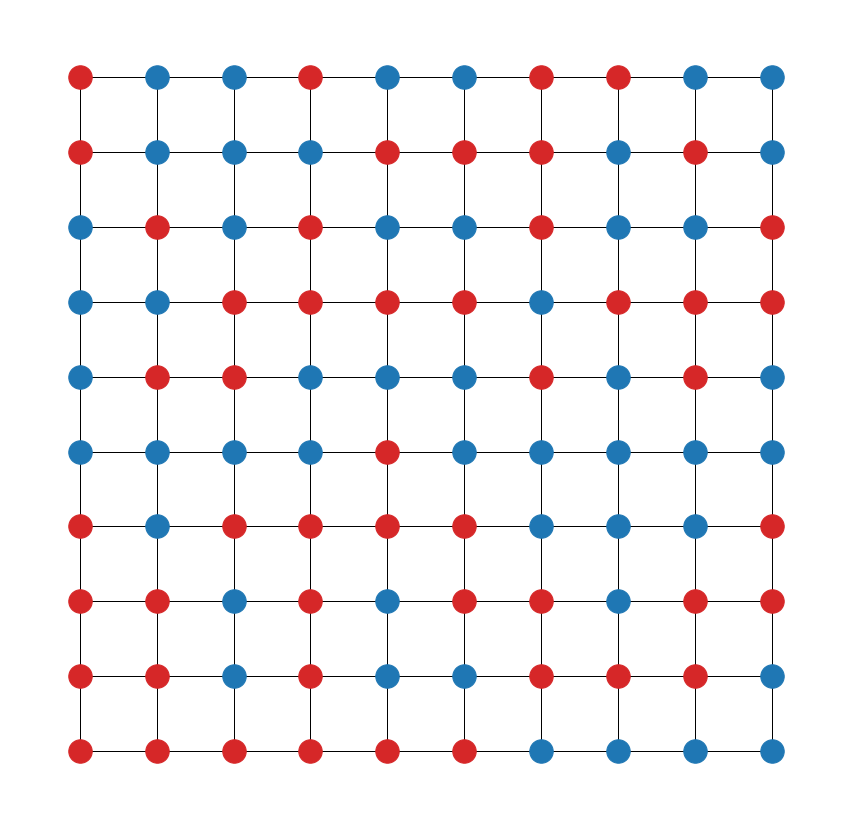

In [8]:
plt.figure(figsize = (12, 12))
N = V//10
graph = nx.grid_2d_graph(N,N)
pos = dict( (n, n) for n in graph.nodes())
ndl, ndl_1 = draw_generated_graph(graph, pos)

In [9]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 50
Красные => 50



*****************************************************
Система вошла в стационарное состояние (итерация 5)
*****************************************************


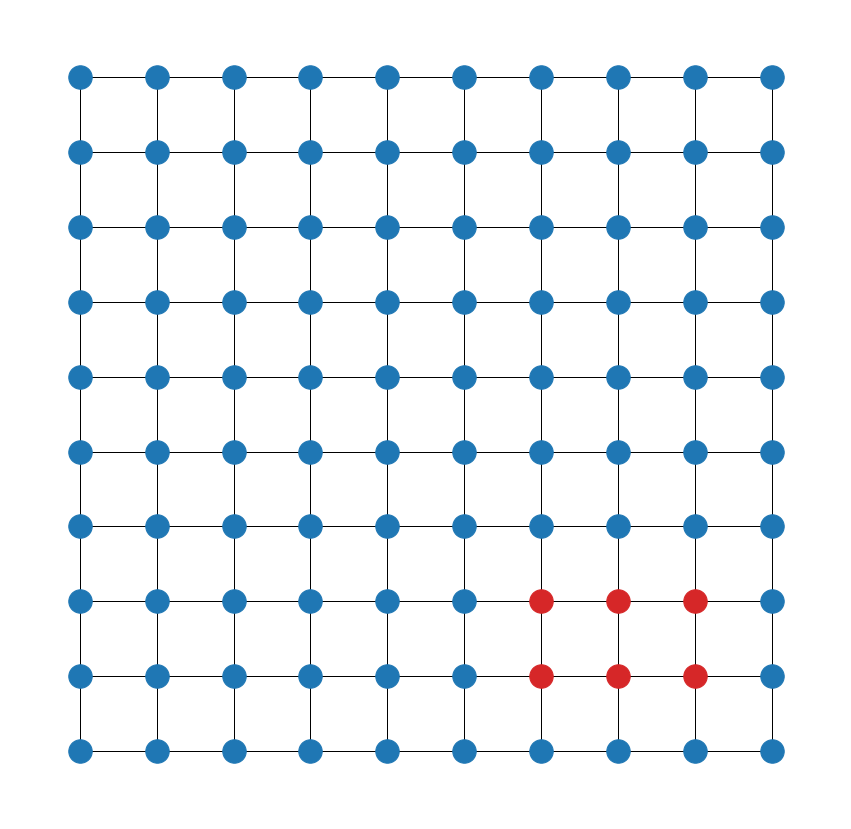

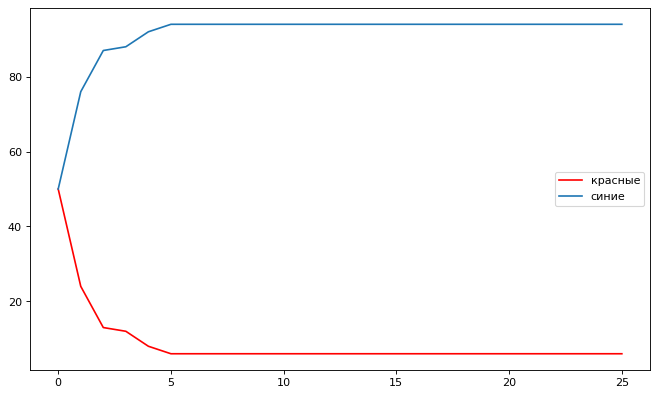

In [10]:
# red_nums, blue_nums = main(graph, ndl, ndl_1)
y1, y2 = generate_chart(*(main(graph, ndl, ndl_1)))

In [11]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 94
Красные => 6


## Шестиугольная решетка

<Figure size 864x864 with 0 Axes>

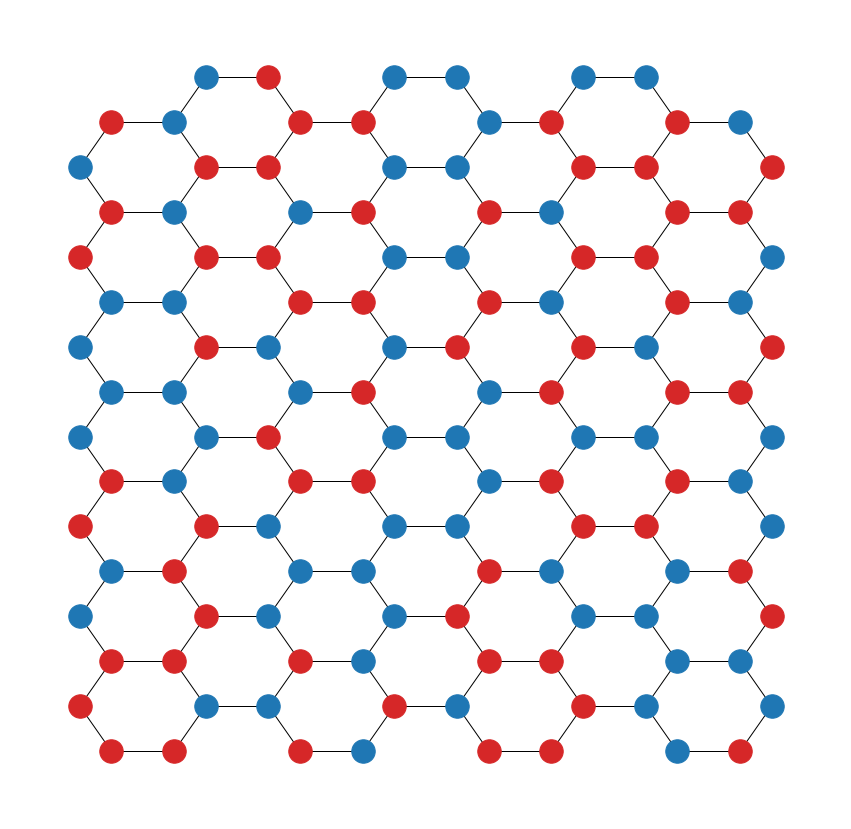

In [12]:
plt.figure(figsize = (12, 12))
N = 7
graph = nx.hexagonal_lattice_graph(N, N, periodic=False, with_positions=True)
pos = nx.get_node_attributes(graph, 'pos')

ndl, ndl_1 = draw_generated_graph(graph, pos)

In [13]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 63
Красные => 63



*****************************************************
Система вошла в стационарное состояние (итерация 4)
*****************************************************


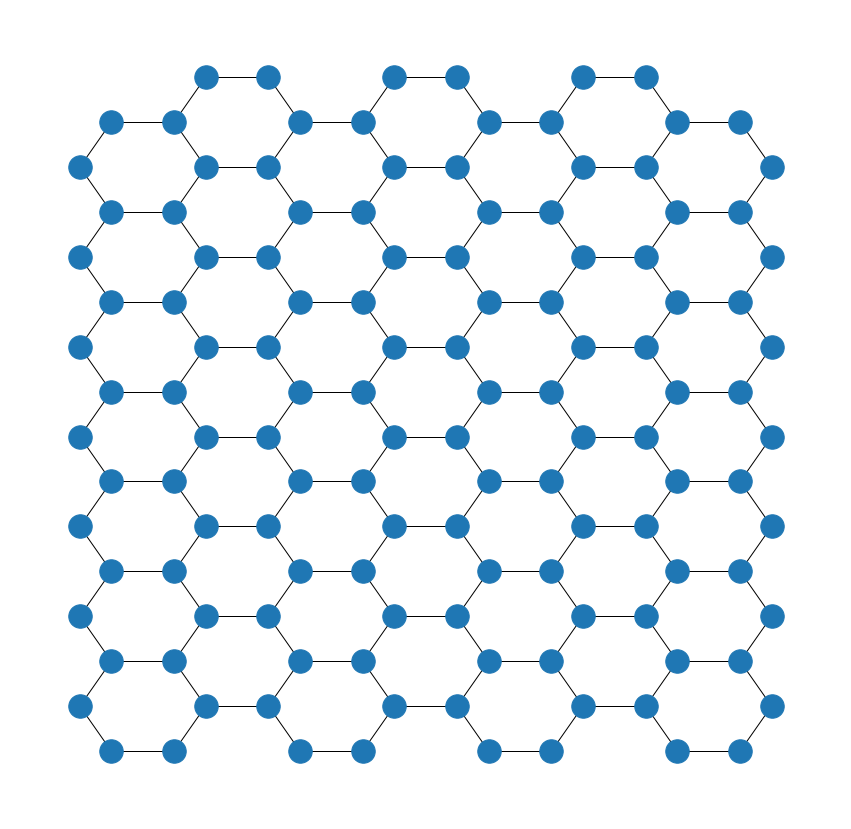

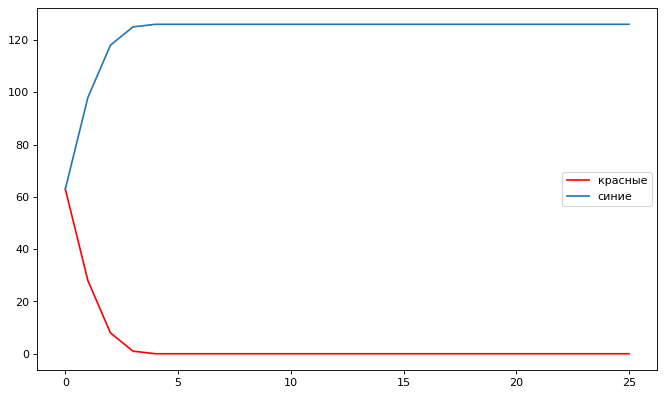

In [14]:
y1, y2 = generate_chart(*(main(graph, ndl, ndl_1)))

In [15]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 126
Красные => 0


## Непериодическая решетка

<Figure size 1152x864 with 0 Axes>

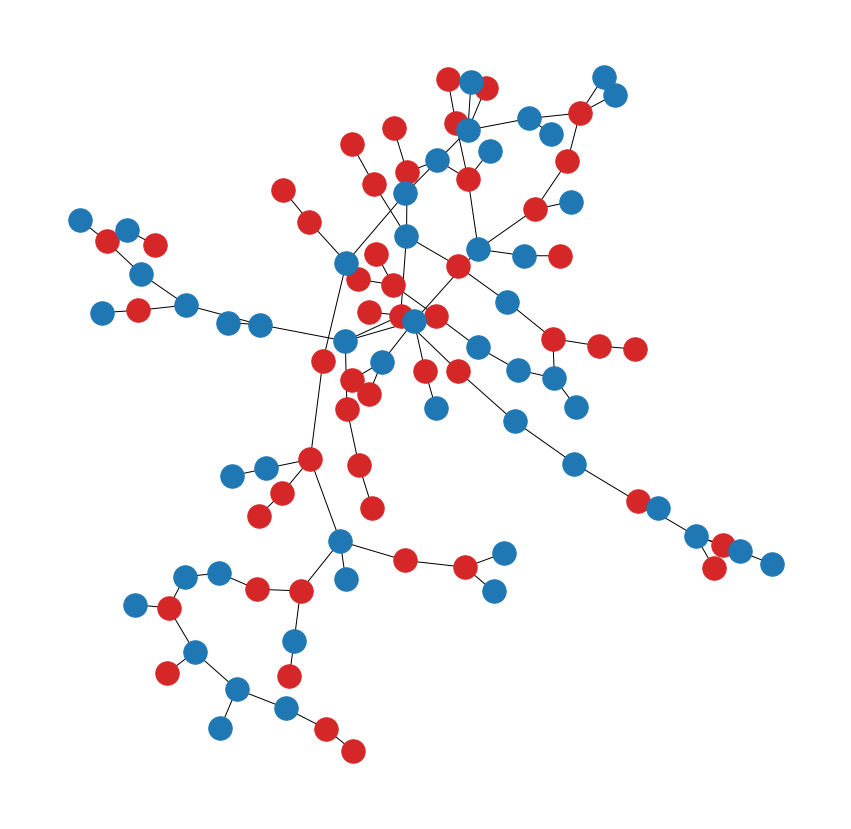

In [16]:
plt.figure(figsize = (16, 12))
graph = nx.watts_strogatz_graph(V, 3, 0.75)
pos = nx.spring_layout(graph)
ndl, ndl_1 = draw_generated_graph(graph, pos)

In [17]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 50
Красные => 50



*****************************************************
Система вошла в стационарное состояние (итерация 4)
*****************************************************


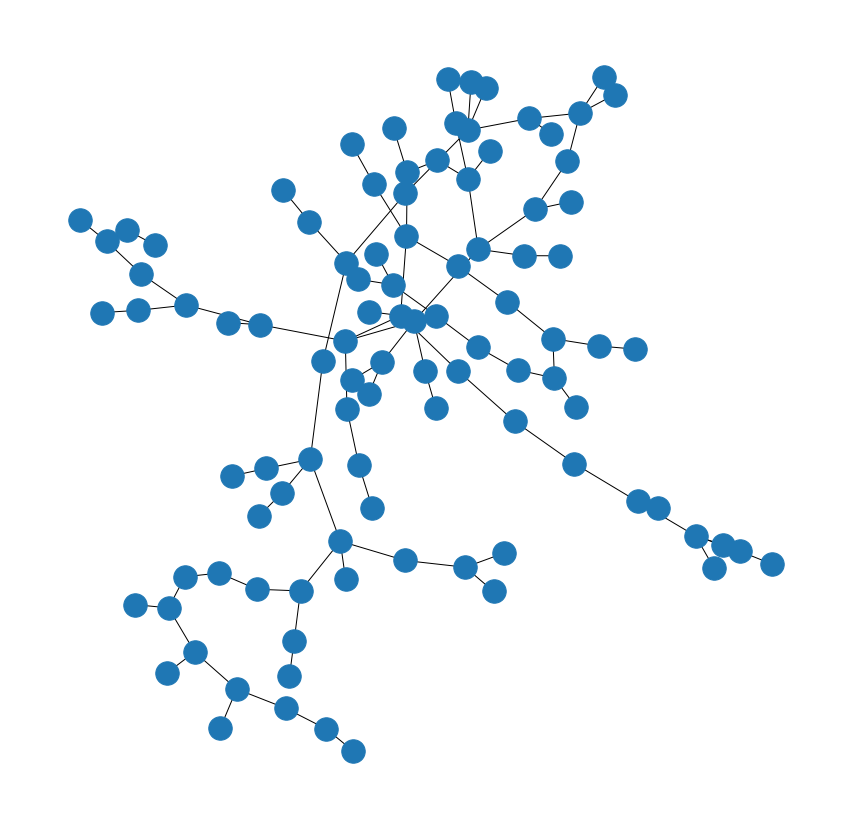

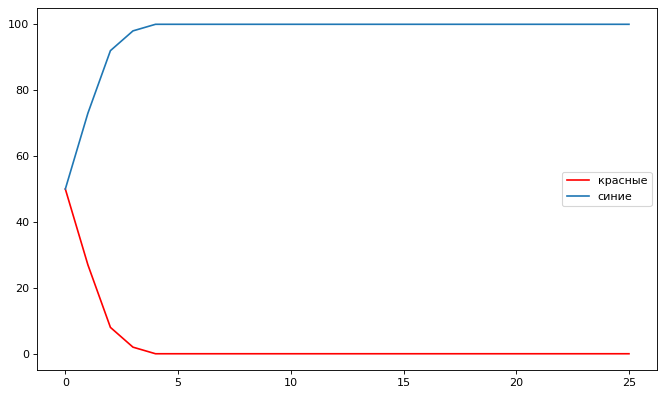

In [18]:
# red_nums, blue_nums = main(graph, ndl, ndl_1)
y1, y2 = generate_chart(*(main(graph, ndl, ndl_1)))

In [19]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 100
Красные => 0


## Квадратная решетка в вероятностями

In [20]:
def iterations_probability(Gr):
    nodes_all_red = []
    nodes_all_blue = []
    for node in Gr.nodes:
        nodes_red = 0
        nodes_blue = 0
        red_p = 1
        for nn in Gr.edges(node):
            if Gr.nodes[nn[1]]['color'] == 'red':
                nodes_red += 1
                red_p *= graph[nn[0]][nn[1]]['p']
            else:
                nodes_blue += 1
        if nodes_red>=nodes_blue and nodes_red!=len(Gr.edges(node)) and red_p >= p_:
            Gr.nodes[nn[0]][ 'color'] = 'red'
            nodes_all_red.append(nn[0])
        else:
            Gr.nodes[nn[0]]['color'] = 'blue'
            nodes_all_blue.append(nn[0])
    return Gr, nodes_all_red, nodes_all_blue


In [21]:
def main_probability(graph, ndl, ndl_1):
    red_nums = [len(ndl)]
    blue_nums = [len(ndl_1)]
    new_graph = graph
    boolean = 0
    for i in range(iterations_num):
        new_graph, red, blue = iterations_probability(new_graph)
        if i and not boolean:
            if len(red) == red_nums[-1] and len(blue) == blue_nums[-1]:
                print(f'\n*****************************************************\nСистема вошла в стационарное состояние (итерация {i})\n*****************************************************')
                boolean = 1
        red_nums.append(len(red))
        blue_nums.append(len(blue))
    draw_graph(new_graph, pos, red, blue)
    return red_nums, blue_nums


In [22]:
def draw_generated_graph(graph, pos, p_min, p_max):
    G_edges = graph.edges()
    G_nodes = graph.nodes()
    V = len(graph.nodes())
    ndl = random.sample(list(G_nodes), k= V//2)
    ndl_1 = [i for i in G_nodes if not i in ndl]
    for i in G_nodes:
        if i in ndl:
            graph.nodes[i]['color'] = 'red'
        else:
            graph.nodes[i]['color'] = 'blue'
    for i in G_edges:
        j1, j2 = i[0], i[1]
        graph[j1][j2]['p'] = round(random.uniform(p_min,p_max), 2)
    draw_graph(graph, pos, ndl, ndl_1)
    return ndl, ndl_1


In [23]:
def draw_graph(graph, pos, red, blue):
    plt.figure(figsize = (15, 15))   
    nx.draw_networkx_nodes(graph, pos, nodelist=red, 
                           node_color="tab:red", node_size = 550)
    nx.draw_networkx_nodes(graph, pos, nodelist=blue, 
                           node_color="tab:blue", node_size = 550) 
    labels = nx.get_edge_attributes(graph, "p")
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=graph.edges())
    plt.axis('off')
    plt.show()


### v1

In [24]:
# промежуток вероятностей 
p_min = 0.4
p_max = 0.7

p_ = 0.05

<Figure size 1152x1152 with 0 Axes>

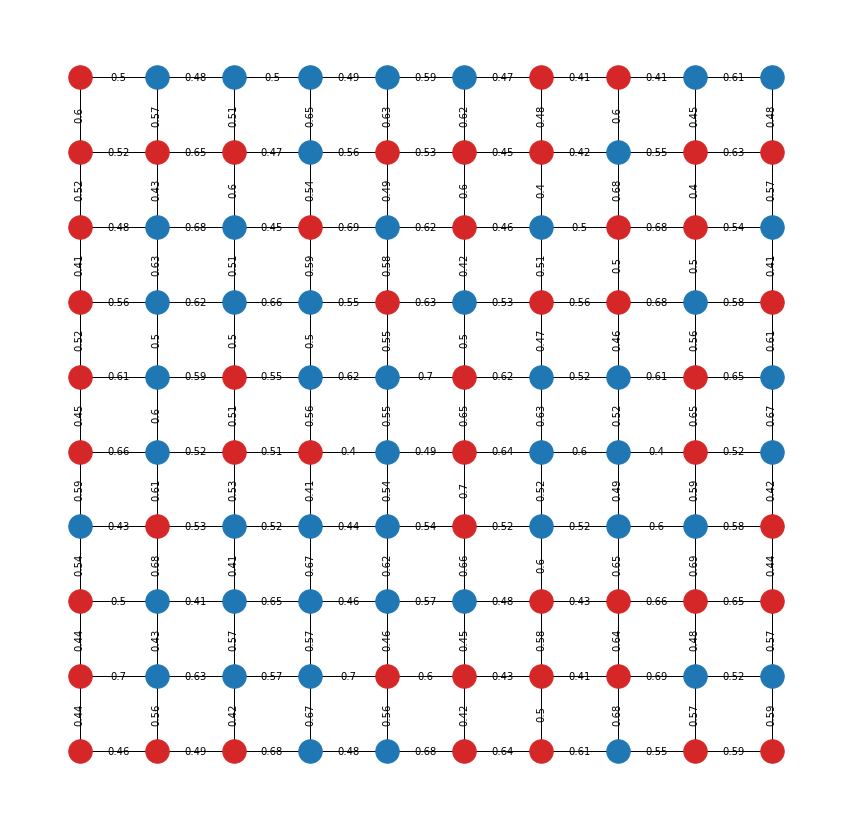

In [25]:
plt.figure(figsize = (16, 16))
N = 10
graph = nx.grid_2d_graph(N,N)
pos = dict( (n, n) for n in graph.nodes())

ndl, ndl_1 = draw_generated_graph(graph, pos, p_min, p_max)

In [26]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 50
Красные => 50


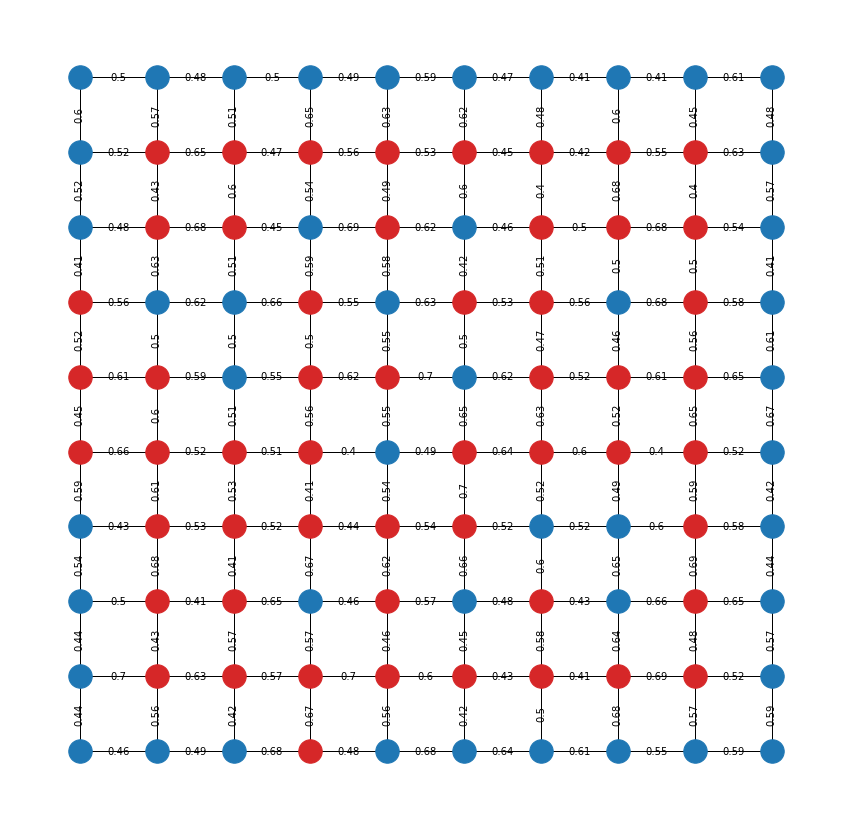

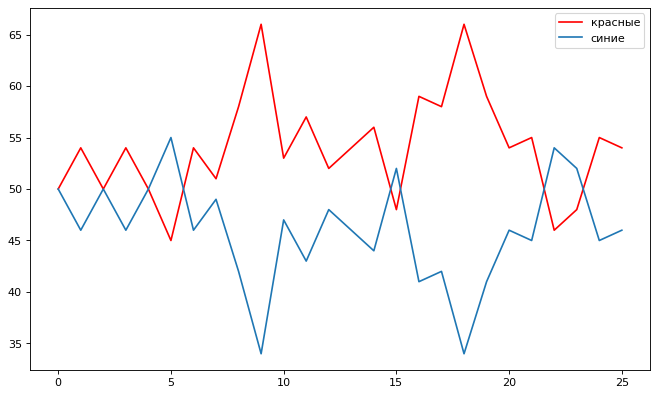

In [27]:
# red_nums, blue_nums = main(graph, ndl, ndl_1)
y1, y2 = generate_chart(*(main_probability(graph, ndl, ndl_1)))

In [28]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 46
Красные => 54


### v2

In [29]:
# промежуток вероятностей 
p_min = 0.3
p_max = 0.6

p_ = 0.01

<Figure size 1152x1152 with 0 Axes>

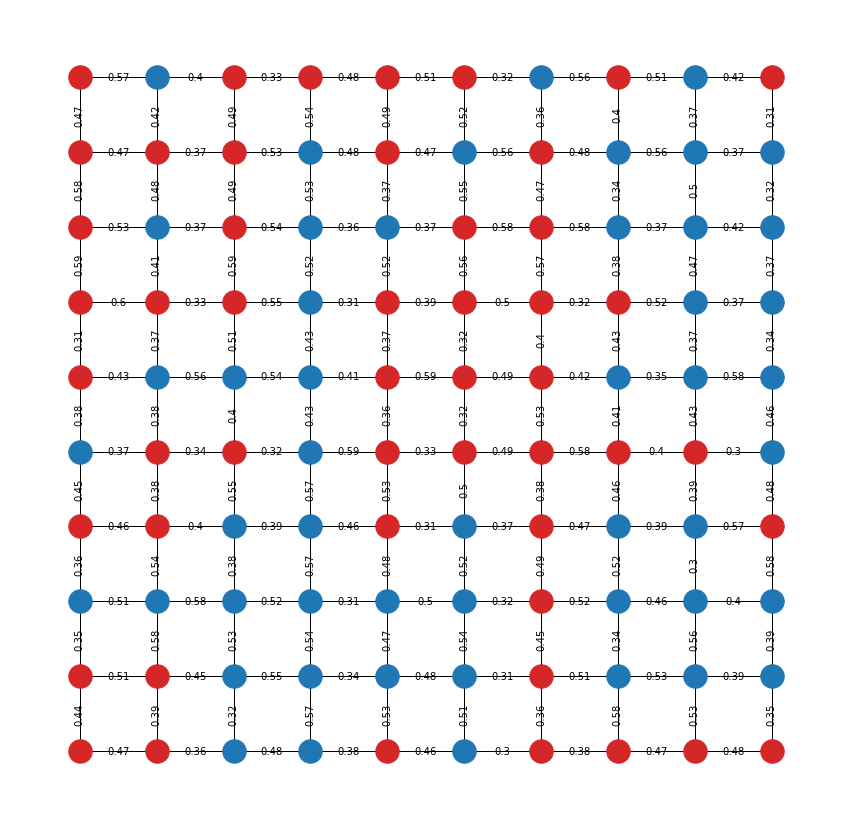

In [30]:
plt.figure(figsize = (16, 16))
N = 10
graph = nx.grid_2d_graph(N,N)
pos = dict( (n, n) for n in graph.nodes())

ndl, ndl_1 = draw_generated_graph(graph, pos, p_min, p_max)

In [31]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 50
Красные => 50



*****************************************************
Система вошла в стационарное состояние (итерация 3)
*****************************************************


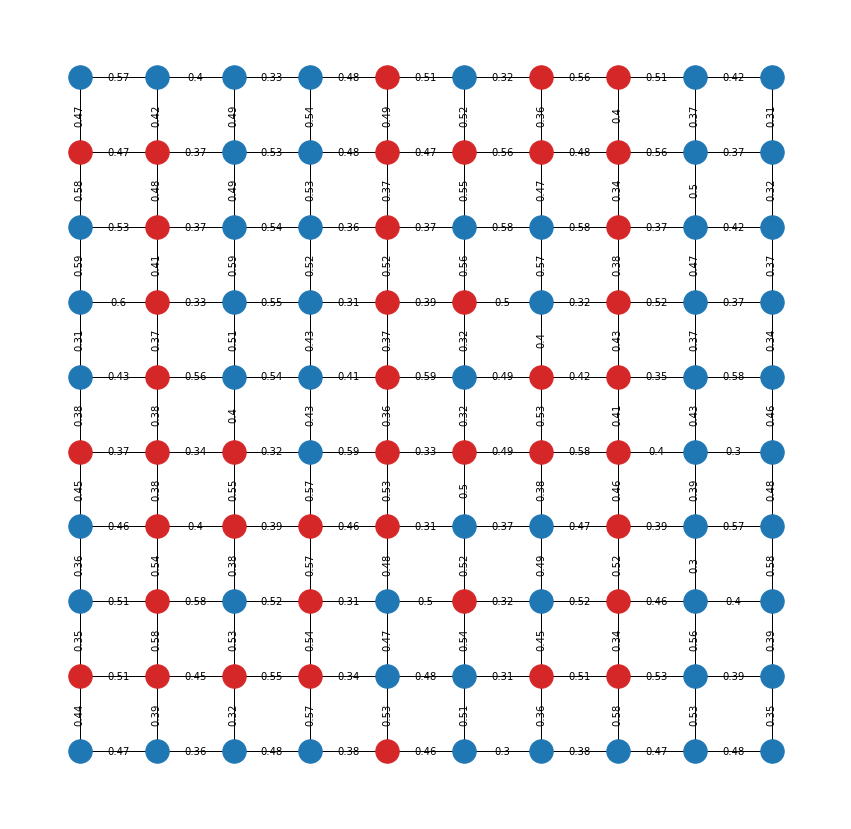

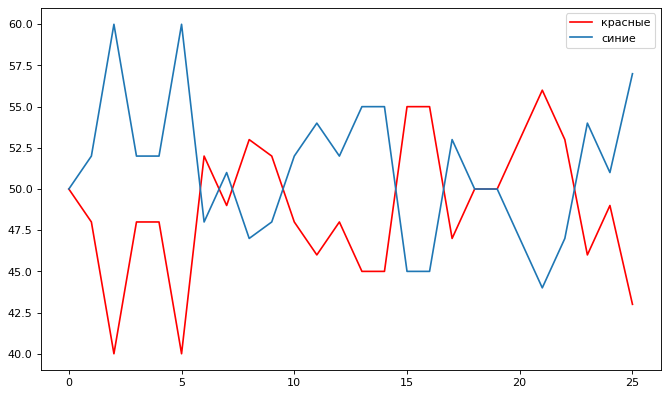

In [32]:
# red_nums, blue_nums = main(graph, ndl, ndl_1)
y1, y2 = generate_chart(*(main_probability(graph, ndl, ndl_1)))

In [33]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 57
Красные => 43


### v3

In [34]:
# промежуток вероятностей 
p_min = 0.2
p_max = 0.7

p_ = 0.1

<Figure size 1152x1152 with 0 Axes>

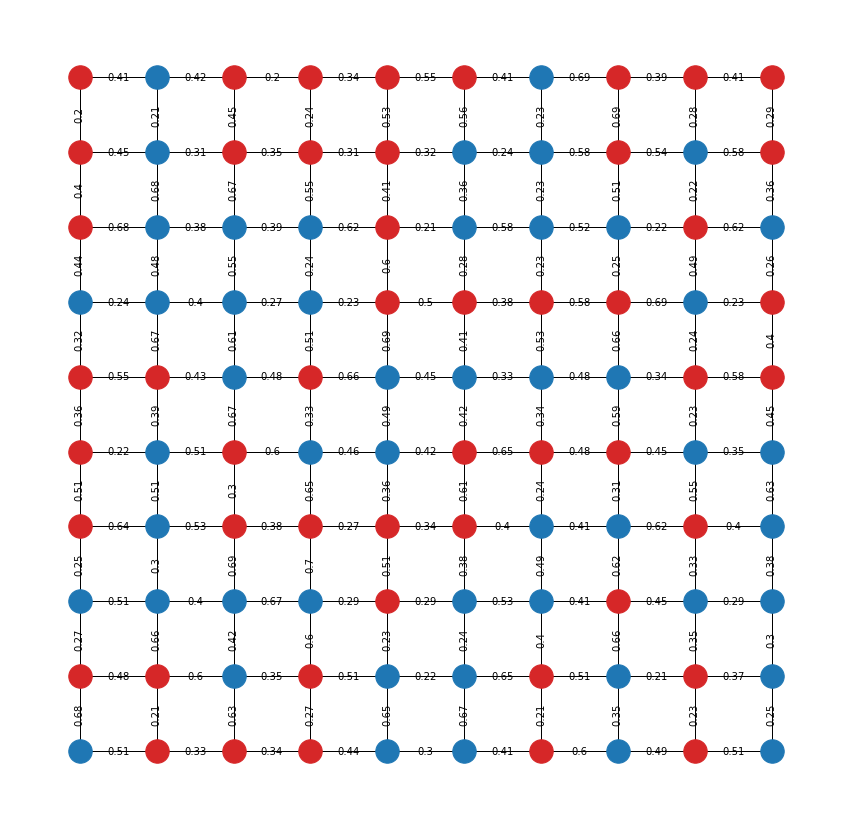

In [35]:
plt.figure(figsize = (16, 16))
N = 10
graph = nx.grid_2d_graph(N,N)
pos = dict( (n, n) for n in graph.nodes())

ndl, ndl_1 = draw_generated_graph(graph, pos, p_min, p_max)

In [36]:
print(f'Cиние => {len(ndl_1)}\nКрасные => {len(ndl)}')

Cиние => 50
Красные => 50



*****************************************************
Система вошла в стационарное состояние (итерация 7)
*****************************************************


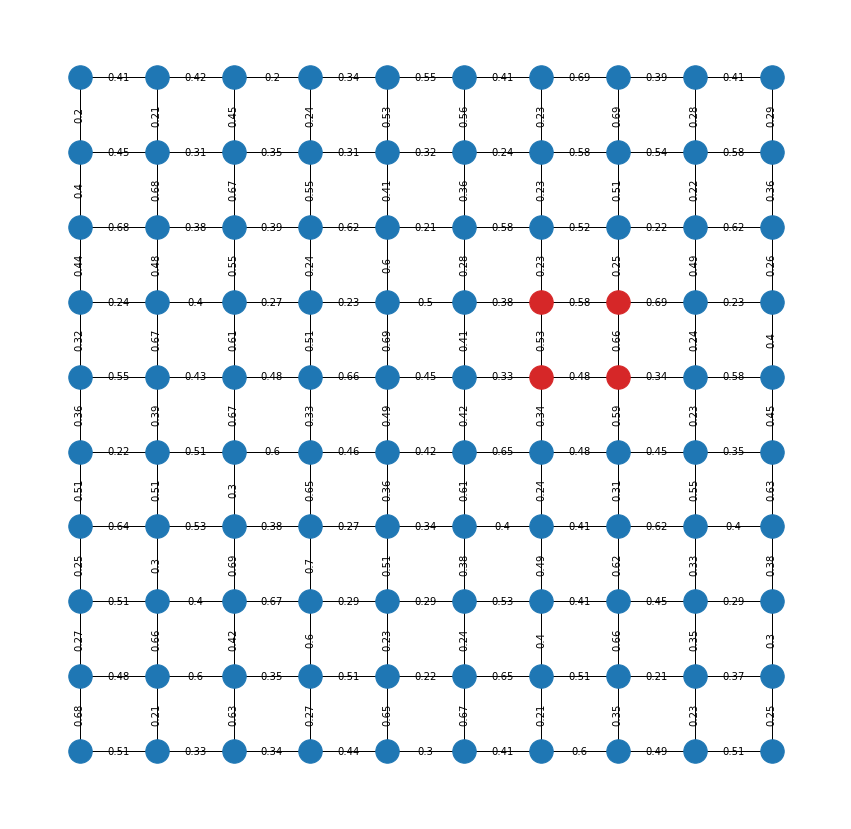

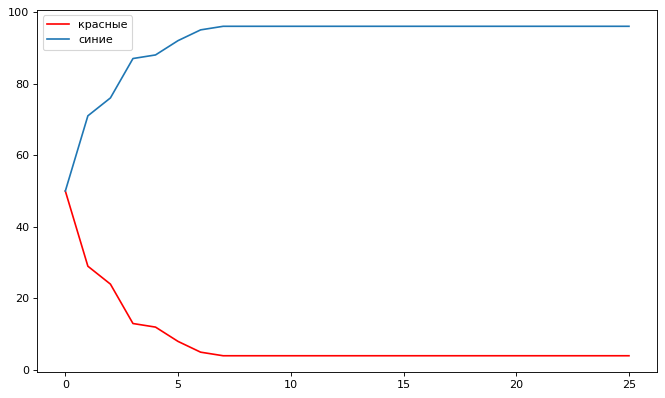

In [37]:
# red_nums, blue_nums = main(graph, ndl, ndl_1)
y1, y2 = generate_chart(*(main_probability(graph, ndl, ndl_1)))

In [38]:
print(f'Cиние => {y2[-1]}\nКрасные => {y1[-1]}')

Cиние => 96
Красные => 4
